In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv("/Users/rahul_anand/Downloads/DailyDelhiClimateTrain.csv")

In [3]:
data.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [4]:
data.describe()

meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
figure = px.area(data, x="date", 
                 y="meantemp", 
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

In [7]:
fig=px.area(data,
           x="date",
           y="humidity",
           title='Humdity in Delhi Over the Years')

fig.show()

In [8]:
fig=px.area(data,
           x="date",
           y="wind_speed",
           title="Wind Speed in Delhi Over the Years")

fig.show()

Text(0, 0.5, 'Mean Temperature')

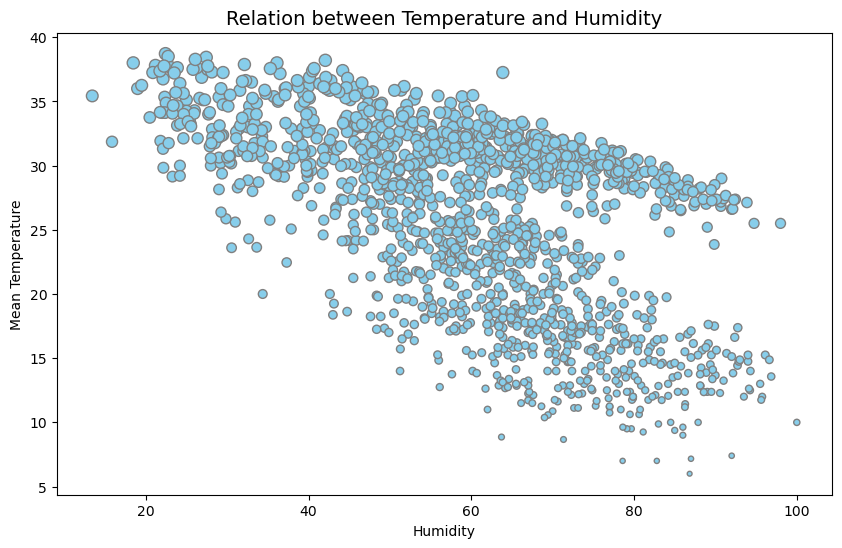

In [9]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['humidity'], 
                      data['meantemp'], 
                      s=data['meantemp'] * 2,  # scale size for visibility 
                      c='skyblue', 
                      edgecolors='gray')

plt.title("Relation between Temperature and Humidity", fontsize=14)
plt.xlabel("Humidity")
plt.ylabel("Mean Temperature")

In [10]:
data["date"]=pd.to_datetime(data["date"], format='%Y-%m-%d')
data["year"]=data['date'].dt.year
data["month"]=data["date"].dt.month
data.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

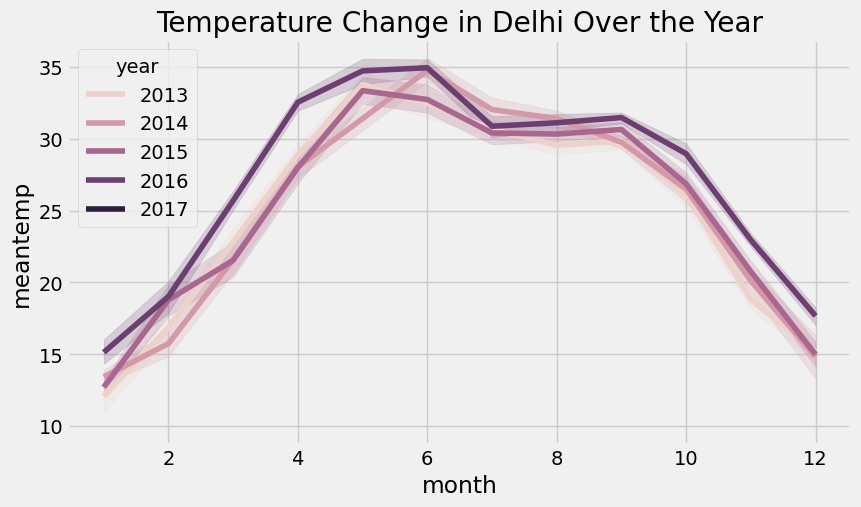

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9, 5))
plt.title("Temperature Change in Delhi Over the Year")
sns.lineplot(data=data, x='month', y='meantemp', hue='year')
plt.show()

In [12]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [13]:
forecast_data=data.rename(columns={"date":"ds",
                                  "meantemp":"y"})
forecast_data.head()

ds          y   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

In [14]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model, predictions)

17:04:31 - cmdstanpy - INFO - Chain [1] start processing
17:04:32 - cmdstanpy - INFO - Chain [1] done processing
